# SEIR model

It’s an acronym for Susceptible, Exposed, Infected, Recovered

The model classifies the population into four mutually exclusive groups: susceptible (at risk of contracting the disease), exposed (infected but not yet infectious), infectious (capable of transmitting the disease), and removed (those who recover or die from the disease). 

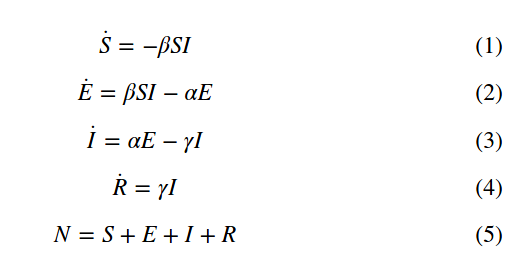

α is the inverse of the incubation period (1/t_incubation)
β is the average contact rate in the population
γ is the inverse of the mean infectious period (1/t_infectious)


The final equation, number (5), is a constraint that indicates there are no birth/migration effects in the model; we have a fixed population from beginning to end.

There’s one more parameter we should discuss, the infamous R0 value.

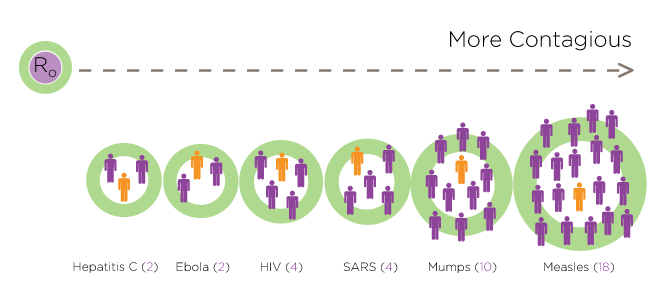

Increasing R0 values indicate more infectious diseases (source: HealthLine.com),
This value defines how quickly the disease spreads and can be related to our parameters through the relationship given in Equation (6).

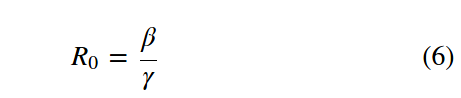

The differential equations describing SIR model were first derived by Kermack and McKendrick [Proc. R. Soc. A, 115, 772 (1927)]:

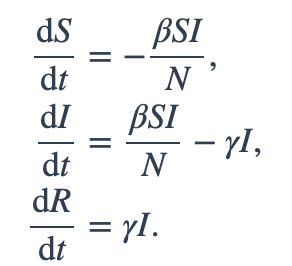

In [1]:
import numpy as np
from matplotlib import pyplot
%matplotlib inline

def base_seir_model(init_vals, params, t):
    S_0, E_0, I_0, R_0 = init_vals
    S, E, I, R = [S_0], [E_0], [I_0], [R_0]
    alpha, beta, gamma = params
    dt = t[1] - t[0]
    for _ in t[1:]:
        next_S = S[-1] - (beta*S[-1]*I[-1])*dt
        next_E = E[-1] + (beta*S[-1]*I[-1] - alpha*E[-1])*dt
        next_I = I[-1] + (alpha*E[-1] - gamma*I[-1])*dt
        next_R = R[-1] + (gamma*I[-1])*dt
        S.append(next_S)
        E.append(next_E)
        I.append(next_I)
        R.append(next_R)
    return np.stack([S, E, I, R])

# Corona virus parameters

A [recent study](https://www.thelancet.com/journals/langlo/article/PIIS2214-109X(20)30074-7/fulltext) of COVID-19 estimates some of these values for us (Hellewell et al. 2020), so we can use some of their parameter estimates to get our model off the ground.

Incubation period = 5 days -> α = 0.2

R0 = 3.5

Unfortunately, this paper doesn’t provide a value for γ, but we can get an estimate from [another paper](https://arxiv.org/pdf/2002.06563.pdf) (which uses a more complex compartmental model) to get our 1/γ value of 2 days, so γ = 0.5.

Plugging the R0 and γ values into Equation (6), we get an estimate of β = 1.75.


We assume we have 10k people in our population, and we begin with one exposed person and the remaining 9,999 susceptible.


In [2]:
# Define parameters
t_max = 100
dt = .1
t = np.linspace(0, t_max, int(t_max/dt) + 1)
N = 10000
init_vals = 1 - 1/N, 1/N, 0, 0
alpha = 0.2
beta = 1.75
gamma = 0.5
params = alpha, beta, gamma
# Run simulation
results = base_seir_model(init_vals, params, t)

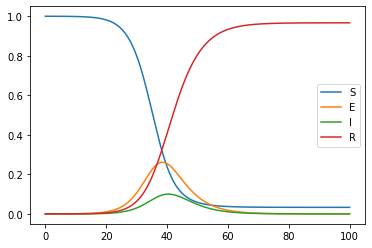

In [3]:
#print(results.shape)
#print(results[:][0].shape)
#print(results[:][1])
#print(results[:][2])
#print(results[:][3])
pyplot.plot(t,results[:][0], label="S" )
pyplot.plot(t,results[:][1], label="E" )
pyplot.plot(t,results[:][2], label="I" )
pyplot.plot(t,results[:][3], label="R" )
pyplot.legend()
pyplot.show()

# Infected Population

This shows that after 40 days 10% of population will be infected. This could be serious.

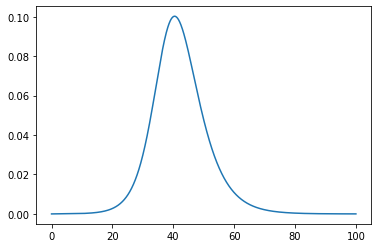

In [4]:
pyplot.plot(t,results[:][2], label="I" )

# Social Distancing

Social distancing includes avoiding large gatherings, physical contact, and other efforts to mitigate the spread of infectious disease. According to our model, the term this is going to impact is our contact rate, β.

Let’s introduce a new value, ρ, to capture our social distancing effect. This is going to be a constant term between 0–1, where 0 indicates everyone is locked down and quarantined while 1 is equivalent to our base case above.

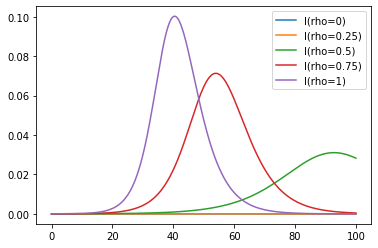

In [5]:
RhoValues = [0, 0.25, 0.5, 0.75, 1]

beta = 1.75

for rho in RhoValues:
    socialBeta = beta*rho
    params = alpha, socialBeta, gamma
    results = base_seir_model(init_vals, params, t)
    pyplot.plot(t,results[:][2], label="I(rho="+str(rho)+")" )
    
pyplot.legend()
pyplot.show()

We go from a base case peak of 10% of the population being infected simultaneously to about 7.5% to a low of 3%. Notice too that it gives people more time to prepare as the peak gets pushed farther out into the future.

These scenarios with social distancing will likely improve the survivability of the disease by giving more time for treatments and supplies to develop while keeping the peaks lower.